In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
# Importation du dataset avec pandas

df = pd.read_csv('dataset.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
nul = df.isna()
nul.sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Supprimer les doublons qui sont dans le 581

df.drop_duplicates(inplace=True)

/tmp/ipykernel_10893/3312828911.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['BMI_category'], y=df['charges'], palette='Blues_d')


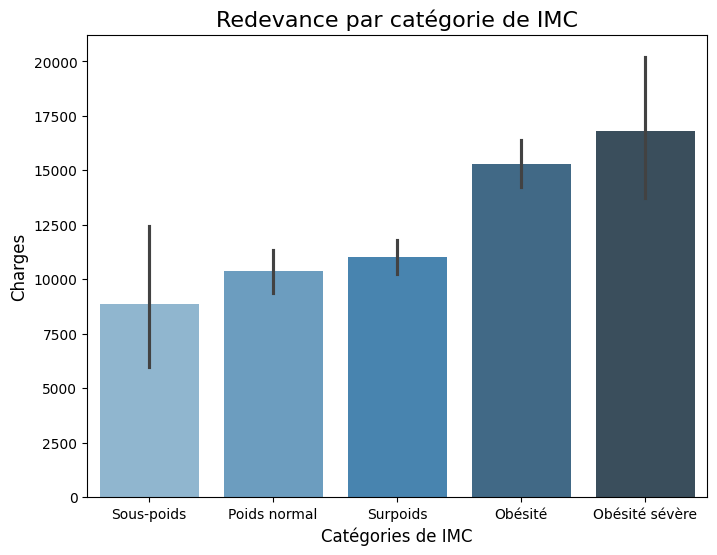

In [7]:
# Définir les tranches de BMI
bins = [0, 18.5, 24.9, 29.9, 40, 100]  # Tranches de BMI
labels = ['Sous-poids', 'Poids normal', 'Surpoids', 'Obésité', 'Obésité sévère']

# Ajouter une nouvelle colonne dans le DataFrame pour les tranches de BMI
df['BMI_category'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)


# Créer un graphique en barres avec les tranches de BMI sur l'axe x
plt.figure(figsize=(8, 6))
sns.barplot(x=df['BMI_category'], y=df['charges'], palette='Blues_d')

# Ajouter les labels et le titre
plt.title('Redevance par catégorie de IMC', fontsize=16)
plt.xlabel('Catégories de IMC', fontsize=12)
plt.ylabel('Charges', fontsize=12)

# Afficher le graphique
plt.show()


In [8]:

df

,age,sex,bmi,children,smoker,region,charges,BMI_category
0,19,female,27.900,0,yes,southwest,16884.92400,Surpoids
1,18,male,33.770,1,no,southeast,1725.55230,Obésité
2,28,male,33.000,3,no,southeast,4449.46200,Obésité
3,33,male,22.705,0,no,northwest,21984.47061,Poids normal
4,32,male,28.880,0,no,northwest,3866.85520,Surpoids
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obésité
1334,18,female,31.920,0,no,northeast,2205.98080,Obésité
1335,18,female,36.850,0,no,southeast,1629.83350,Obésité
1336,21,female,25.800,0,no,southwest,2007.94500,Surpoids


In [9]:
df.iloc[581]

age                         39
sex                       male
bmi                      45.43
children                     2
smoker                      no
region               southeast
charges              6356.2707
BMI_category    Obésité sévère
Name: 582, dtype: object

Sur ce graphique on peut constater que plus l'IMC est élévé plus les clients ont une redevance élévée avec de gros écarts de min-max avec 

/tmp/ipykernel_10893/3336949216.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['age_categories'], y=df['charges'], palette='Blues_d')


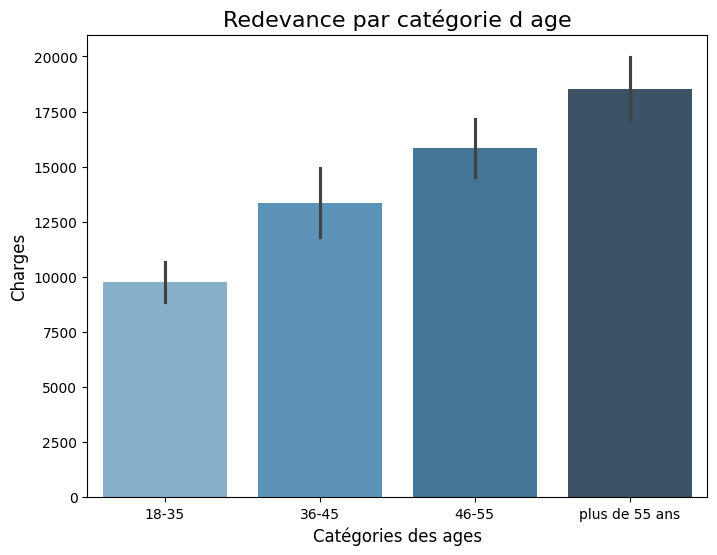

In [10]:
# Définir les tranches d'ages
bins = [18, 36, 45, 55, 65]  # Tranches de BMI
labels = ['18-35', '36-45', '46-55', 'plus de 55 ans']

# Ajouter une nouvelle colonne dans le DataFrame pour les tranches de BMI
df['age_categories'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Créer un graphique en barres avec les tranches des ages sur l'axe x
plt.figure(figsize=(8, 6))
sns.barplot(x=df['age_categories'], y=df['charges'], palette='Blues_d')

# Ajouter les labels et le titre
plt.title('Redevance par catégorie d age', fontsize=16)
plt.xlabel('Catégories des ages', fontsize=12)
plt.ylabel('Charges', fontsize=12)

# Afficher le graphique
plt.show()

Intuitivement avec ce graphique on peut conclure qu'en plus de l'IMC l'age sera une variable explicative

/tmp/ipykernel_10893/3493434044.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['sex'], y=df['charges'], palette='Blues_d')


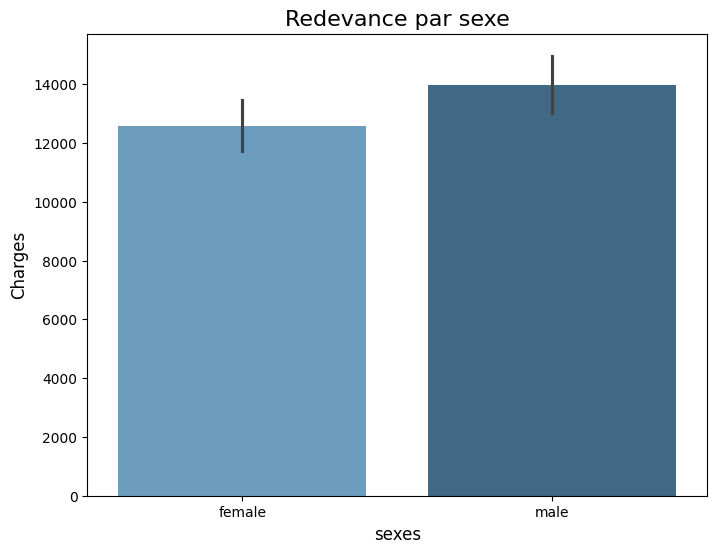

In [11]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df['sex'], y=df['charges'], palette='Blues_d')

# Ajouter les labels et le titre
plt.title('Redevance par sexe', fontsize=16)
plt.xlabel('sexes', fontsize=12)
plt.ylabel('Charges', fontsize=12)

# Afficher le graphique
plt.show()

Les femmes payent moins chers que les hommes, cela doit être peu significatif

/tmp/ipykernel_10893/3868014665.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['smoker'], y=df['charges'], palette='Blues_d')


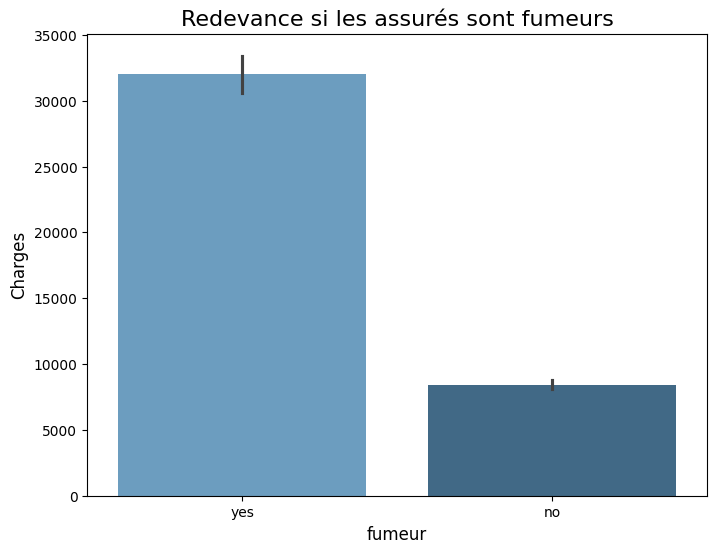

In [12]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df['smoker'], y=df['charges'], palette='Blues_d')

# Ajouter les labels et le titre
plt.title('Redevance si les assurés sont fumeurs', fontsize=16)
plt.xlabel('fumeur', fontsize=12)
plt.ylabel('Charges', fontsize=12)

# Afficher le graphique
plt.show()

/tmp/ipykernel_10893/3684351634.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['smoker'], y=df['charges'], palette='Blues_d')


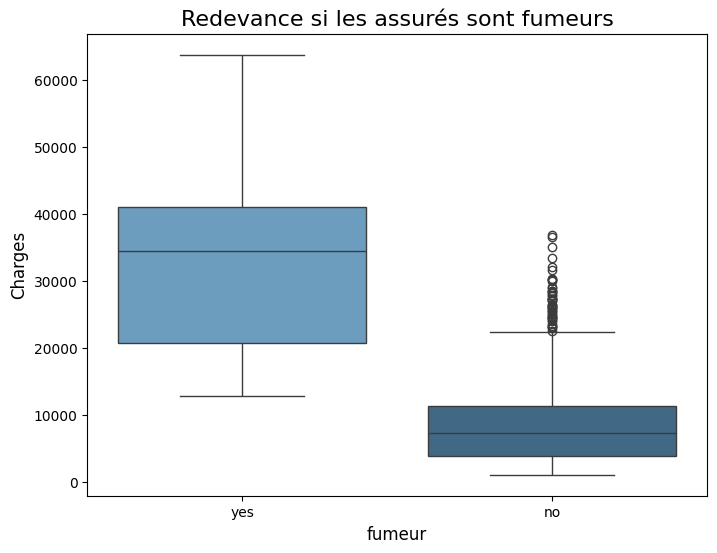

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['smoker'], y=df['charges'], palette='Blues_d')

# Ajouter les labels et le titre
plt.title('Redevance si les assurés sont fumeurs', fontsize=16)
plt.xlabel('fumeur', fontsize=12)
plt.ylabel('Charges', fontsize=12)

# Afficher le graphique
plt.show()

si les clients sont fumeurs la redevance est 3 fois plus elevée

In [14]:
df['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

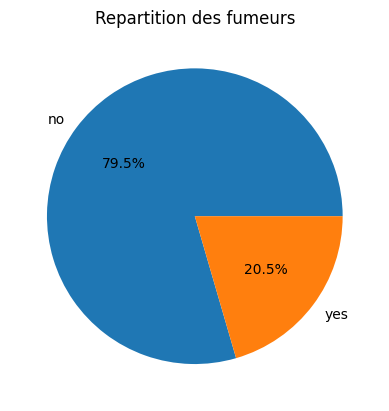

In [15]:
# Répartition des fumeurs dans le dataset

y = df['smoker'].value_counts()

plt.pie(y, labels=y.index, autopct='%1.1f%%')
plt.title('Repartition des fumeurs')
plt.show() 

<Axes: >

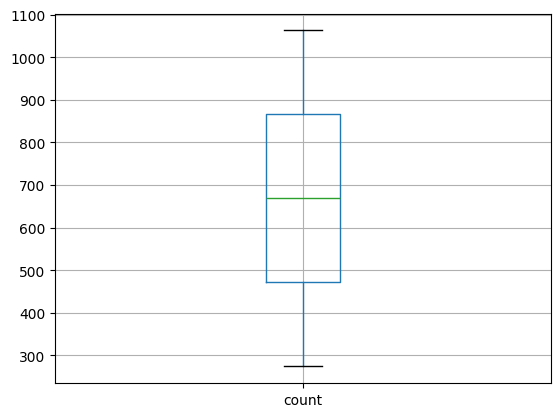

In [16]:
pd.DataFrame(df['smoker'].value_counts()).boxplot()

In [17]:
df_sans_fumeur = df[df['smoker'] == 'no']

df_sans_fumeur

,age,sex,bmi,children,smoker,region,charges,BMI_category,age_categories
1,18,male,33.770,1,no,southeast,1725.55230,Obésité,18-35
2,28,male,33.000,3,no,southeast,4449.46200,Obésité,18-35
3,33,male,22.705,0,no,northwest,21984.47061,Poids normal,18-35
4,32,male,28.880,0,no,northwest,3866.85520,Surpoids,18-35
5,31,female,25.740,0,no,southeast,3756.62160,Surpoids,18-35
...,...,...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500,Obésité sévère,46-55
1333,50,male,30.970,3,no,northwest,10600.54830,Obésité,46-55
1334,18,female,31.920,0,no,northeast,2205.98080,Obésité,18-35
1335,18,female,36.850,0,no,southeast,1629.83350,Obésité,18-35


<Axes: >

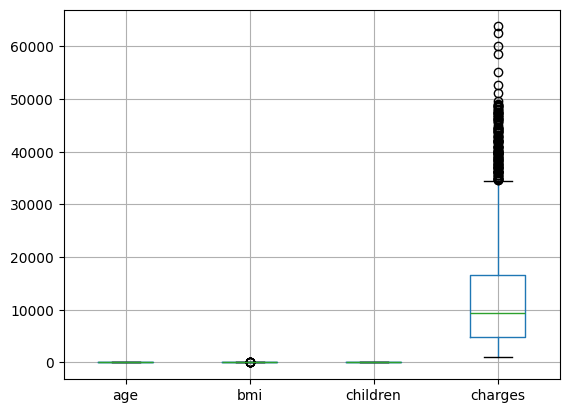

In [18]:
df.boxplot()

In [19]:
q1 = df['charges'].quantile(0.25)
q3 = df['charges'].quantile(0.75)
IQR = q3-q1
borne_supp = q3+(1.5*IQR)

borne_supp

np.float64(34524.777625)

In [20]:
df_aberrant = df[df['charges']> borne_supp]

In [21]:
df_aberrant['smoker'].value_counts()

# on constate qu'il y a 136 fumeurs sur les 139 valeurs aberrantes du dataset

smoker
yes    136
no       3
Name: count, dtype: int64

In [22]:
df_aberrant.describe()

,age,bmi,children,charges
count,139.000000,139.000000,139.000000,139.000000
mean,41.079137,35.564604,1.187050,42103.947206
std,13.801420,4.434917,1.126546,5582.168107
min,18.000000,22.895000,0.000000,34617.840650
25%,30.000000,32.667500,0.000000,37786.149950
50%,43.000000,35.200000,1.000000,40974.164900
75%,52.500000,37.660000,2.000000,45786.706425
max,64.000000,52.580000,4.000000,63770.428010


In [23]:
df_sans_aberrants = df[df['charges']< borne_supp]
df_sans_aberrants.describe()

,age,bmi,children,charges
count,1198.000000,1198.000000,1198.000000,1198.000000
mean,39.006678,30.094787,1.085142,9934.671758
std,14.062040,6.013044,1.214407,7240.216987
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.800000,0.000000,4418.591062
50%,39.000000,29.735000,1.000000,8411.754950
75%,51.000000,33.820000,2.000000,12955.356300
max,64.000000,53.130000,5.000000,34472.841000


/tmp/ipykernel_10893/4216878230.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['children'], y=df['charges'], palette='Blues_d')


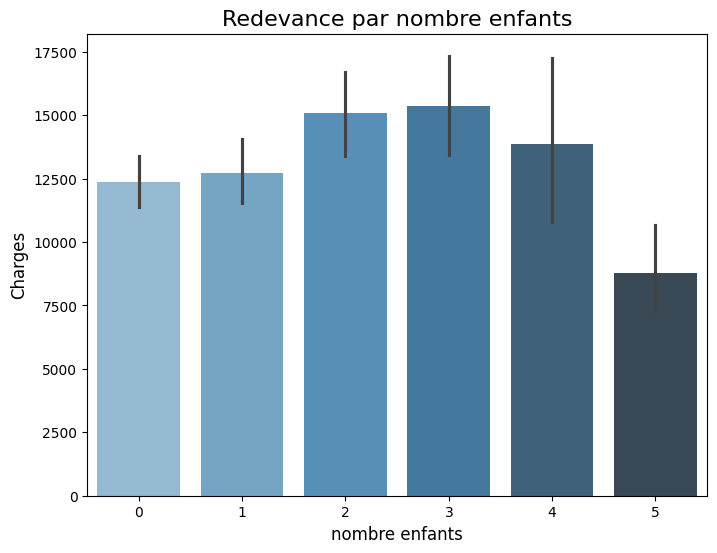

In [24]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df['children'], y=df['charges'], palette='Blues_d')

# Ajouter les labels et le titre
plt.title('Redevance par nombre enfants', fontsize=16)
plt.xlabel('nombre enfants', fontsize=12)
plt.ylabel('Charges', fontsize=12)

# Afficher le graphique
plt.show()

/tmp/ipykernel_10893/643234131.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['children'], y=df['charges'], palette='Blues_d')


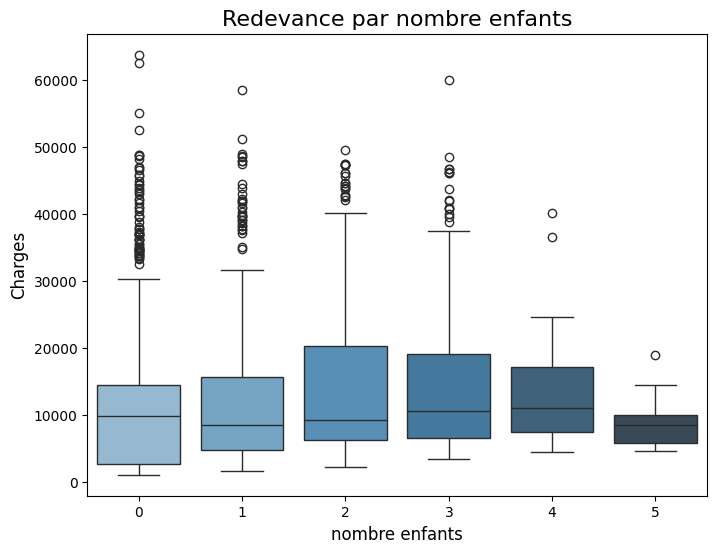

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['children'], y=df['charges'], palette='Blues_d')

# Ajouter les labels et le titre
plt.title('Redevance par nombre enfants', fontsize=16)
plt.xlabel('nombre enfants', fontsize=12)
plt.ylabel('Charges', fontsize=12)

# Afficher le graphique
plt.show()

on note que les clients avec plus de 3 enfants, la prime et moins elevées que les autres ce qui est surprenant, de plus leur nombres est moins élevé par rapport aux personnes avec moins de 4 enfants. il y a plus de dispersions chez les personnes sans enfant

In [26]:
df_moins_5_enfants = df[df['children'] == 3 ]
df_moins_5_enfants.sort_values(by= 'charges')

,age,sex,bmi,children,smoker,region,charges,BMI_category,age_categories
880,22,male,34.800,3,no,southwest,3443.06400,Obésité,18-35
369,18,male,30.400,3,no,northeast,3481.86800,Obésité,18-35
1092,23,male,32.700,3,no,southwest,3591.48000,Obésité,18-35
817,23,male,37.100,3,no,southwest,3597.59600,Obésité,18-35
586,21,male,20.235,3,no,northeast,3861.20965,Poids normal,18-35
...,...,...,...,...,...,...,...,...,...
883,51,female,37.050,3,yes,northeast,46255.11250,Obésité,46-55
1122,53,female,36.860,3,yes,northwest,46661.44240,Obésité,46-55
1301,62,male,30.875,3,yes,northwest,46718.16325,Obésité,plus de 55 ans
281,54,male,40.565,3,yes,northeast,48549.17835,Obésité sévère,46-55


In [27]:
df.sort_values(by = 'charges').tail()

,age,sex,bmi,children,smoker,region,charges,BMI_category,age_categories
819,33,female,35.530,0,yes,northwest,55135.40209,Obésité,18-35
577,31,female,38.095,1,yes,northeast,58571.07448,Obésité,18-35
1230,52,male,34.485,3,yes,northwest,60021.39897,Obésité,46-55
1300,45,male,30.360,0,yes,southeast,62592.87309,Obésité,46-55
543,54,female,47.410,0,yes,southeast,63770.42801,Obésité sévère,46-55


In [28]:
df.sort_values(by='charges').tail()

,age,sex,bmi,children,smoker,region,charges,BMI_category,age_categories
819,33,female,35.530,0,yes,northwest,55135.40209,Obésité,18-35
577,31,female,38.095,1,yes,northeast,58571.07448,Obésité,18-35
1230,52,male,34.485,3,yes,northwest,60021.39897,Obésité,46-55
1300,45,male,30.360,0,yes,southeast,62592.87309,Obésité,46-55
543,54,female,47.410,0,yes,southeast,63770.42801,Obésité sévère,46-55


In [29]:
#Voir si les femmes obeses sont plus disciminées que les hommes obèses

df_obesite = df[(df['BMI_category']== 'Obésité')|(df['BMI_category']== 'Obésité sévère')]
df_obesite

,age,sex,bmi,children,smoker,region,charges,BMI_category,age_categories
1,18,male,33.77,1,no,southeast,1725.55230,Obésité,18-35
2,28,male,33.00,3,no,southeast,4449.46200,Obésité,18-35
6,46,female,33.44,1,no,southeast,8240.58960,Obésité,46-55
12,23,male,34.40,0,no,southwest,1826.84300,Obésité,18-35
13,56,female,39.82,0,no,southeast,11090.71780,Obésité,plus de 55 ans
...,...,...,...,...,...,...,...,...,...
1331,23,female,33.40,0,no,southwest,10795.93733,Obésité,18-35
1332,52,female,44.70,3,no,southwest,11411.68500,Obésité sévère,46-55
1333,50,male,30.97,3,no,northwest,10600.54830,Obésité,46-55
1334,18,female,31.92,0,no,northeast,2205.98080,Obésité,18-35


/tmp/ipykernel_10893/435497350.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_obesite['sex'], y=df_obesite['charges'], palette='Blues_d')


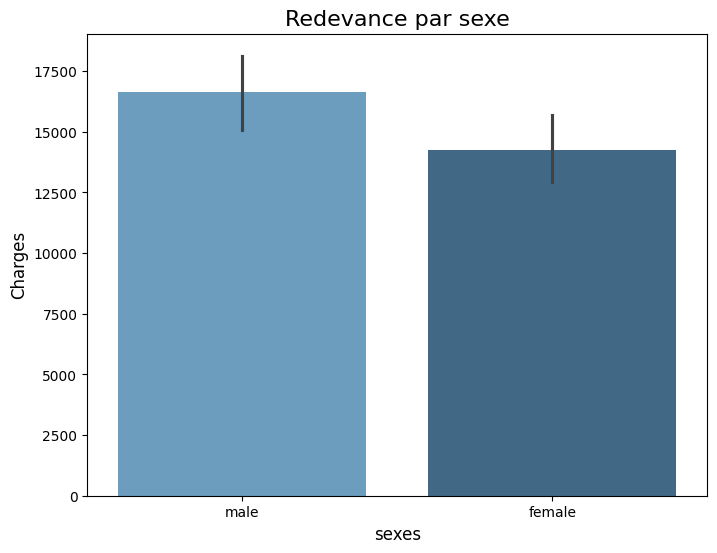

In [30]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df_obesite['sex'], y=df_obesite['charges'], palette='Blues_d')

# Ajouter les labels et le titre
plt.title('Redevance par sexe', fontsize=16)
plt.xlabel('sexes', fontsize=12)
plt.ylabel('Charges', fontsize=12)

# Afficher le graphique
plt.show()

/tmp/ipykernel_10893/4111591751.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_obesite['sex'], y=df_obesite['charges'], palette='Blues_d')


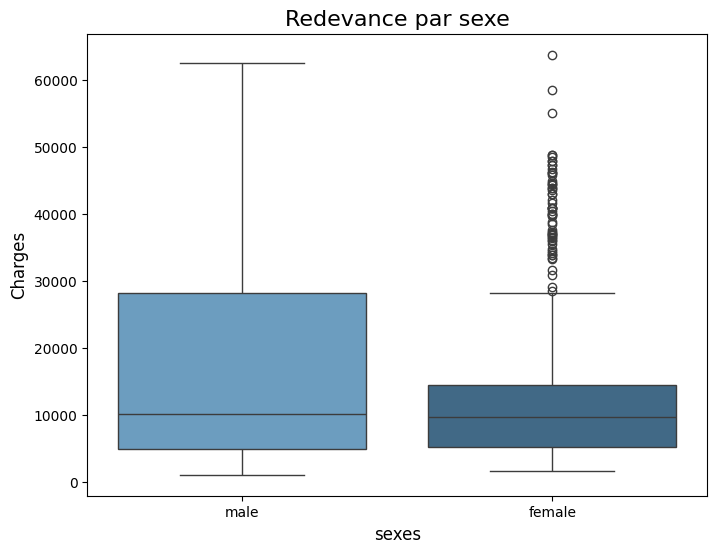

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_obesite['sex'], y=df_obesite['charges'], palette='Blues_d')

# Ajouter les labels et le titre
plt.title('Redevance par sexe', fontsize=16)
plt.xlabel('sexes', fontsize=12)
plt.ylabel('Charges', fontsize=12)

# Afficher le graphique
plt.show()

quand les personnes sont en obésité la différence de redevance entre les hommes et les femmes, la différence entre les deux sexes se creuse légérement en faveur des femmes

In [32]:
df['BMI_category'].value_counts()

BMI_category
Obésité           627
Surpoids          377
Poids normal      222
Obésité sévère     91
Sous-poids         20
Name: count, dtype: int64

In [33]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

y a t il des discriminations par région

/tmp/ipykernel_10893/1809750766.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_obesite['region'], y=df_obesite['charges'], palette='Blues_d')


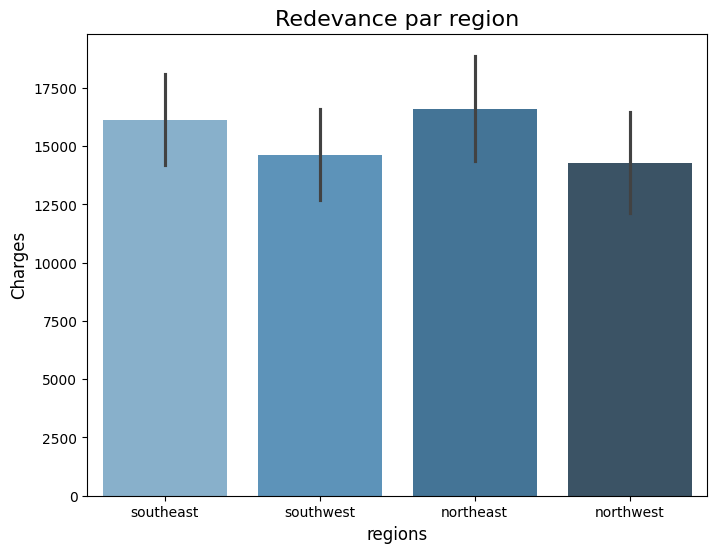

In [34]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df_obesite['region'], y=df_obesite['charges'], palette='Blues_d')

# Ajouter les labels et le titre
plt.title('Redevance par region', fontsize=16)
plt.xlabel('regions', fontsize=12)
plt.ylabel('Charges', fontsize=12)

# Afficher le graphique
plt.show()

avec l'analyse et les tableaux on constate que les critères qui peuvent expliquer les différences de prix sont :


- les fumeurs, payent en moyenne 3 fois plus de redevance que les non-fumeurs
- Ensuite ce qui est à peu près égaux ce sont les critères vis à vis de l'age et du poids
- Le sexe joue une différence assez minime et pareil pour la région quuand on est de l'ouest on paye moins que l'est

maintenant à voir dans le cas de la modélisation

<Axes: xlabel='bmi', ylabel='charges'>

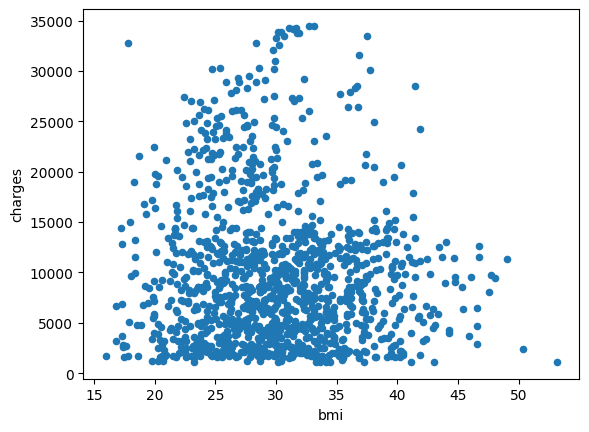

In [35]:
df_sans_aberrants.plot(x = 'bmi', y ='charges', kind = 'scatter', legend='BMI_category')

In [36]:
df_sans_aberrants.sort_values(by= 'charges').head(25)

,age,sex,bmi,children,smoker,region,charges,BMI_category,age_categories
940,18,male,23.21,0,no,southeast,1121.8739,Poids normal,18-35
808,18,male,30.14,0,no,southeast,1131.5066,Obésité,18-35
1244,18,male,33.33,0,no,southeast,1135.9407,Obésité,18-35
663,18,male,33.66,0,no,southeast,1136.3994,Obésité,18-35
22,18,male,34.10,0,no,southeast,1137.0110,Obésité,18-35
194,18,male,34.43,0,no,southeast,1137.4697,Obésité,18-35
866,18,male,37.29,0,no,southeast,1141.4451,Obésité,18-35
781,18,male,41.14,0,no,southeast,1146.7966,Obésité sévère,18-35
442,18,male,43.01,0,no,southeast,1149.3959,Obésité sévère,18-35
1317,18,male,53.13,0,no,southeast,1163.4627,Obésité sévère,18-35


In [37]:
df.value_counts('sex')

sex
male      675
female    662
Name: count, dtype: int64

In [38]:
df['charges'].mean()

np.float64(13279.121486655948)

In [39]:
np.pow(2,2)

np.int64(4)

In [40]:
#création de la fonction de corrélation de pearson

def correlation_pearson(x,y):
    sum_r_numerateur = 0
    sum_x_denominateur = 0
    sum_y_denominateur = 0
    y_moy = y.mean()
    x_moy = x.mean()

    for i in range(len(x)):
        num_calc = (x[i]-x_moy)*(y[i] - y_moy)
        sum_r_numerateur += num_calc
        denom_x_calc = pow(x[i]-x_moy, 2)
        sum_x_denominateur += denom_x_calc
        denom_y_calc = pow(y[i] - y_moy, 2)
        sum_y_denominateur += denom_y_calc


    return sum_r_numerateur / (np.sqrt(sum_x_denominateur) * np.sqrt(sum_y_denominateur))
        




In [41]:
df['bmi'][len(df['bmi']+1)]

np.float64(29.07)

In [42]:
corr_bmi = correlation_pearson(df['bmi'], df['charges'])

corr_bmi

KeyError: 581

In [192]:
corr_age = correlation_pearson(df['age'], df['charges'])
corr_age

np.float64(0.29830821250978584)

In [193]:
corr_chil = correlation_pearson(df['children'], df['charges'])
corr_chil

np.float64(0.06738935083963249)

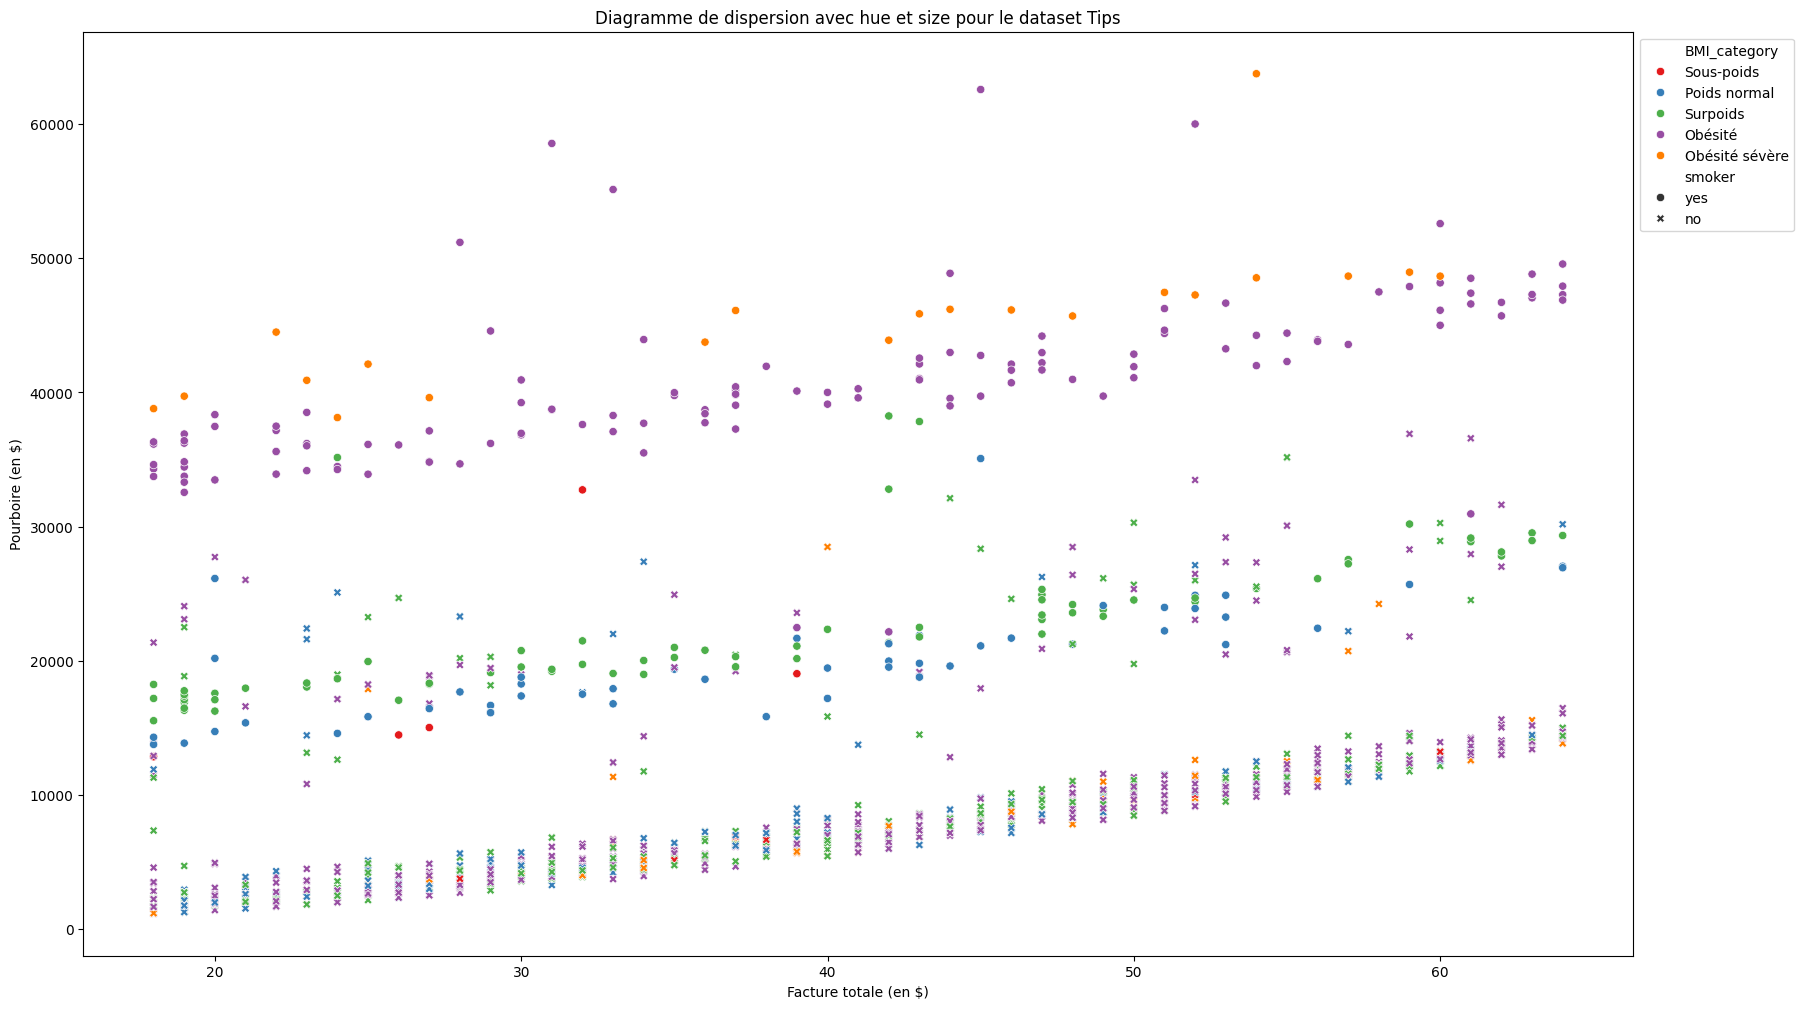

In [15]:
# Diagramme de dispersion avec teinte (hue) et taille (size)
plt.figure(figsize=(20, 12))
sns.scatterplot(
    x="age", 
    y="charges", 
    data=df, 
    hue="BMI_category",        # Couleur par jour (catégoriel)
    style = 'smoker',
    # size="size",      # Varier la taille du marqueur par colonne de taille (numérique)
    sizes=(20, 200),  # Définir la taille des marqueurs
    palette="Set1"    # Palette de couleurs
)
plt.title("Diagramme de dispersion avec hue et size pour le dataset Tips")
plt.xlabel("Facture totale (en $)")
plt.ylabel("Pourboire (en $)")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [18]:
#Label encoder pour le sexe et si les usagers sont fumeurs

labe_encod = LabelEncoder()
df['sex_encode']= labe_encod.fit_transform(df['sex'])
df['smoker_encode']= labe_encod.fit_transform(df['smoker'])
df

,age,sex,bmi,children,smoker,region,charges,BMI_category,age_categories,sex_encode,smoker_encode
0,19,female,27.900,0,yes,southwest,16884.92400,Surpoids,18-35,0,1
1,18,male,33.770,1,no,southeast,1725.55230,Obésité,18-35,1,0
2,28,male,33.000,3,no,southeast,4449.46200,Obésité,18-35,1,0
3,33,male,22.705,0,no,northwest,21984.47061,Poids normal,18-35,1,0
4,32,male,28.880,0,no,northwest,3866.85520,Surpoids,18-35,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obésité,46-55,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,Obésité,18-35,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,Obésité,18-35,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,Surpoids,18-35,0,0


In [22]:
# encodage par région et par bmi category

df_reg_encod = pd.get_dummies(df['region'])
df_reg_encod.replace(False, 0, inplace=True)
df_reg_encod.replace(True, 1, inplace=True)
df_reg_encod

df_bmi_encod = pd.get_dummies(df['BMI_category'])
df_bmi_encod.replace(False, 0, inplace=True)
df_bmi_encod.replace(True, 1, inplace=True)
df_bmi_encod

C:\Users\DELL 7490\AppData\Local\Temp\ipykernel_12848\2260671963.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_reg_encod.replace(True, 1, inplace=True)
C:\Users\DELL 7490\AppData\Local\Temp\ipykernel_12848\2260671963.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bmi_encod.replace(True, 1, inplace=True)


,Sous-poids,Poids normal,Surpoids,Obésité,Obésité sévère
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
1333,0,0,0,1,0
1334,0,0,0,1,0
1335,0,0,0,1,0
1336,0,0,1,0,0


In [34]:
#concatener les df encodé avec le df

df_2 = pd.concat([df,df_reg_encod,df_bmi_encod], axis=1)
df_2

,age,sex,bmi,children,smoker,region,charges,BMI_category,age_categories,sex_encode,smoker_encode,northeast,northwest,southeast,southwest,Sous-poids,Poids normal,Surpoids,Obésité,Obésité sévère
0,19,female,27.900,0,yes,southwest,16884.92400,Surpoids,18-35,0,1,0,0,0,1,0,0,1,0,0
1,18,male,33.770,1,no,southeast,1725.55230,Obésité,18-35,1,0,0,0,1,0,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,Obésité,18-35,1,0,0,0,1,0,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,Poids normal,18-35,1,0,0,1,0,0,0,1,0,0,0
4,32,male,28.880,0,no,northwest,3866.85520,Surpoids,18-35,1,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obésité,46-55,1,0,0,1,0,0,0,0,0,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,Obésité,18-35,0,0,1,0,0,0,0,0,0,1,0
1335,18,female,36.850,0,no,southeast,1629.83350,Obésité,18-35,0,0,0,0,1,0,0,0,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,Surpoids,18-35,0,0,0,0,0,1,0,0,1,0,0


In [35]:
#supprimer les colonnes qui ont été encodés

df_2.drop(columns=['sex','smoker','region','BMI_category','age_categories'],inplace=True)
df_2

,age,bmi,children,charges,sex_encode,smoker_encode,northeast,northwest,southeast,southwest,Sous-poids,Poids normal,Surpoids,Obésité,Obésité sévère
0,19,27.900,0,16884.92400,0,1,0,0,0,1,0,0,1,0,0
1,18,33.770,1,1725.55230,1,0,0,0,1,0,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0,0,1,0,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,1,0,0,0,0,0,1,0
1334,18,31.920,0,2205.98080,0,0,1,0,0,0,0,0,0,1,0
1335,18,36.850,0,1629.83350,0,0,0,0,1,0,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,0,1,0,0,1,0,0


In [37]:
df_corr = df_2.corr()

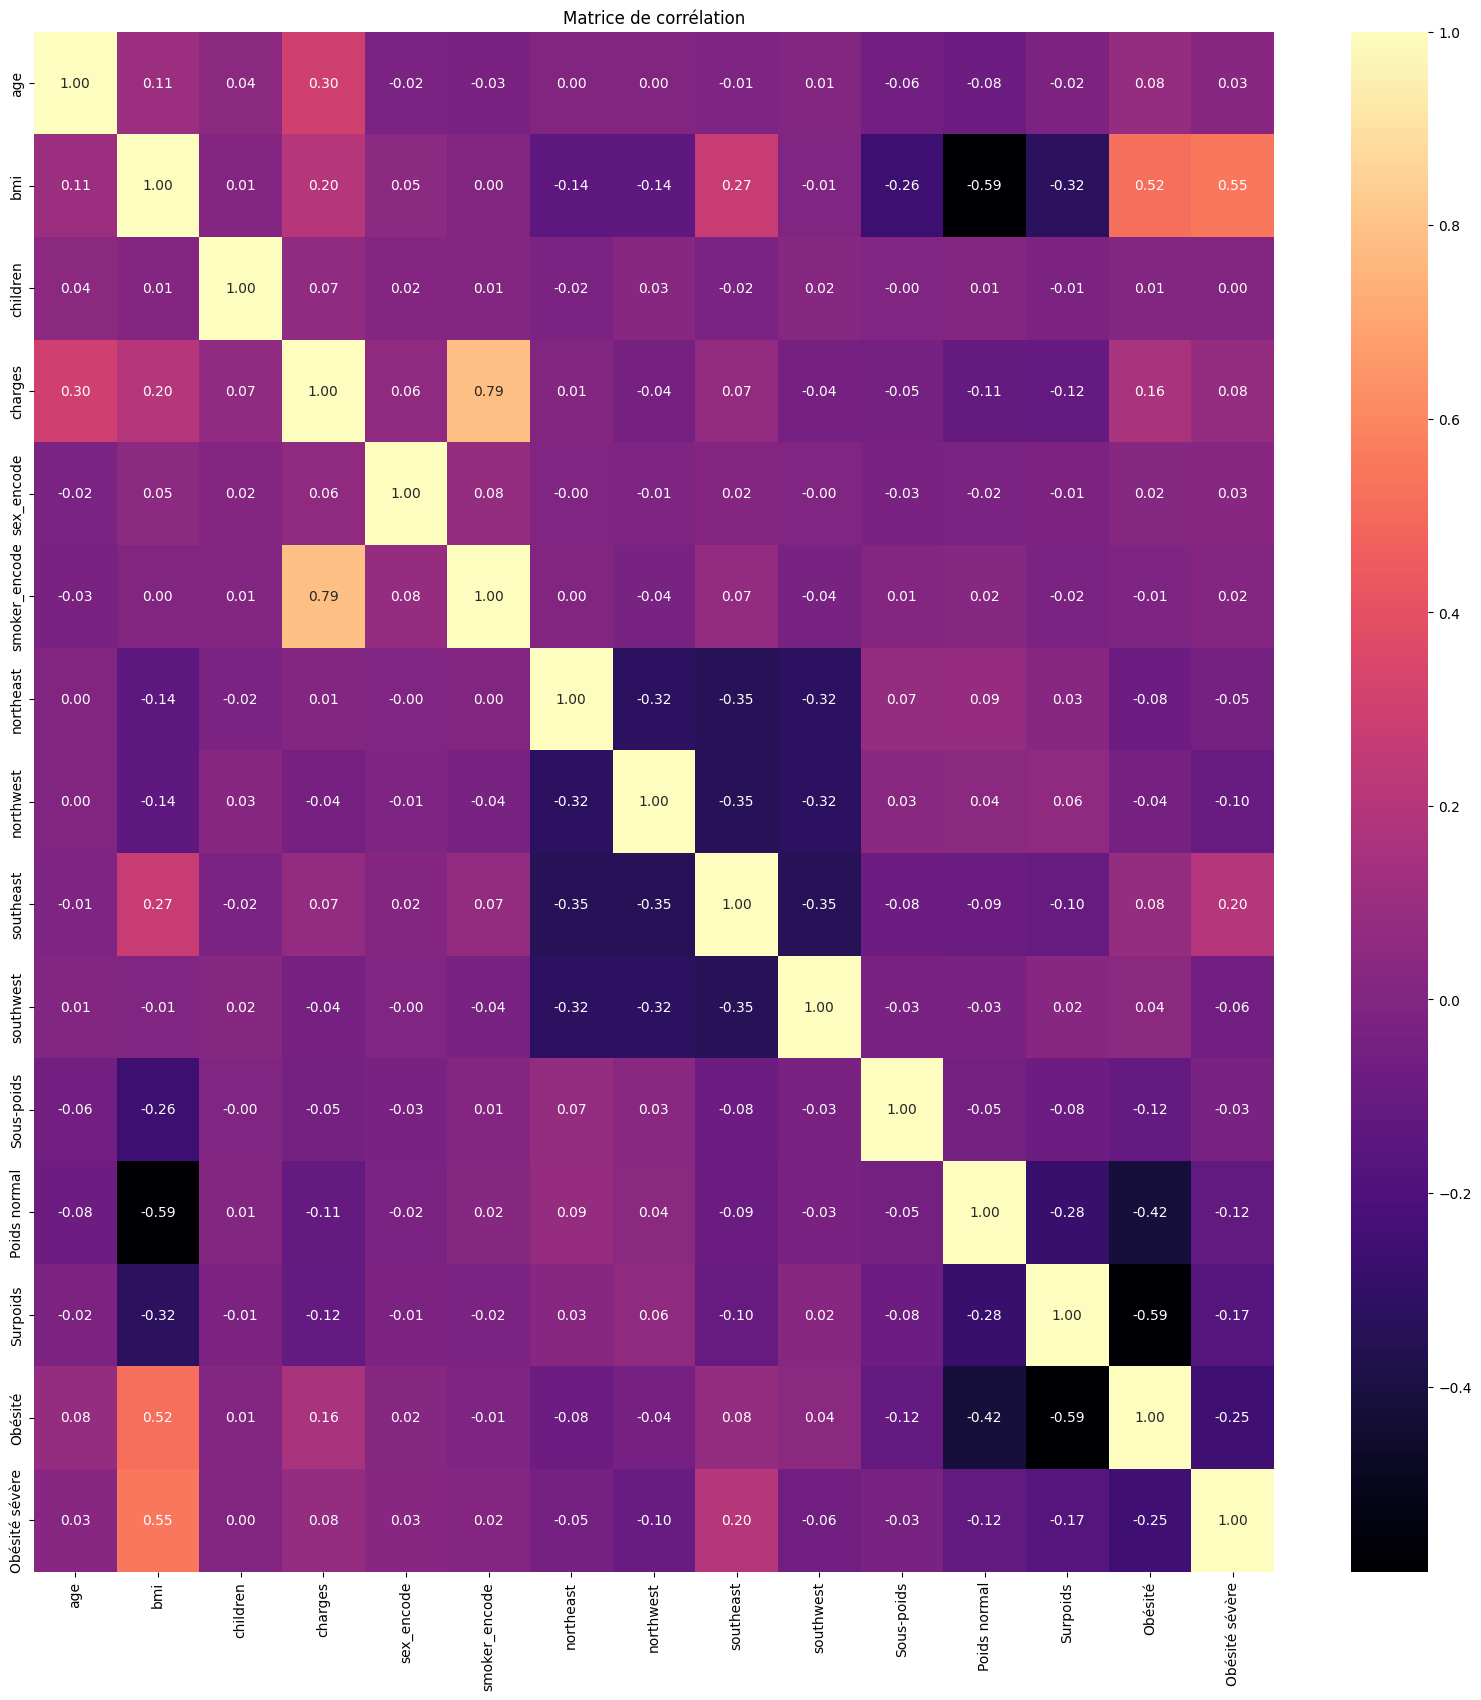

In [40]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_corr, annot=True, cmap='magma', fmt='.2f')
plt.title("Matrice de corrélation")
plt.show()

In [44]:
from scipy.stats import spearmanr, pearsonr

# il y a une tres forte corrélation entre le fait l'IMC et le montant de la redevance


r, p_value = spearmanr(df['bmi'], df['charges'])

print(f"Coefficient de corrélation de Spearman: {r}")
print(f"P-valeur: {p_value}")


Coefficient de corrélation de Spearman: 0.11958495819244366
P-valeur: 1.1637179203181515e-05


In [55]:
#il y a une tres forte corrélation entre le montant de charge entre les fumeurs et non fumeurs

r, p_value = pearsonr(df['smoker_encode'], df['charges'])

print(f"Coefficient de corrélation de Pearson: {r}")
print(f"P-valeur: {p_value}")

Coefficient de corrélation de Pearson: 0.7872343672800317
P-valeur: 1.4067220949375676e-282


In [54]:
#lien entre le fait d'être fumeur et le sexe

r, p_value = pearsonr( df_2['smoker_encode'], df_2['sex_encode'])

print(f"Coefficient de corrélation de Pearson: {r}")
print(f"P-valeur: {p_value}")

Coefficient de corrélation de Pearson: 0.07659585039335855
P-valeur: 0.005075132315667085


In [68]:
df_2

,age,bmi,children,charges,sex_encode,smoker_encode,northeast,northwest,southeast,southwest,Sous-poids,Poids normal,Surpoids,Obésité,Obésité sévère
0,19,27.900,0,16884.92400,0,1,0,0,0,1,0,0,1,0,0
1,18,33.770,1,1725.55230,1,0,0,0,1,0,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0,0,1,0,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,1,0,0,0,0,0,1,0
1334,18,31.920,0,2205.98080,0,0,1,0,0,0,0,0,0,1,0
1335,18,36.850,0,1629.83350,0,0,0,0,1,0,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,0,1,0,0,1,0,0


In [66]:
for i in range(len(df_2.columns)):
    r,p_value = pearsonr(df_2['charges'], df_2[str(df_2.columns[i])])
    if p_value < 0.05:
        print(f"\033[31mCoefficient de corrélation de Pearson entre la charge et la variable et {df_2.columns[i]}: {r}")
        print(f"\033[31mP-valeur: {p_value}\033[0m ")
        print('=======================================')
        print('')
    else:
        print(f"Coefficient de corrélation de Pearson entre la charge et la variable et {df_2.columns[i]}: {r}")
        print(f"P-valeur: {p_value}")
        print('=======================================')
        print('')

Coefficient de corrélation de Pearson entre la charge et la variable et age: 0.29830821250978645
P-valeur: 6.975748762691935e-29 

Coefficient de corrélation de Pearson entre la charge et la variable et bmi: 0.19840083122624935
P-valeur: 2.4680404264514255e-13 

Coefficient de corrélation de Pearson entre la charge et la variable et children: 0.06738935083963249
P-valeur: 0.013717026292987093 

Coefficient de corrélation de Pearson entre la charge et la variable et charges: 1.0
P-valeur: 0.0 

Coefficient de corrélation de Pearson entre la charge et la variable et sex_encode: 0.05804449579031286
P-valeur: 0.03382079199511954 

Coefficient de corrélation de Pearson entre la charge et la variable et smoker_encode: 0.7872343672800317
P-valeur: 1.4067220949375676e-282 

Coefficient de corrélation de Pearson entre la charge et la variable et northeast: 0.005945323272979339
P-valeur: 0.828060748670876

Coefficient de corrélation de Pearson entre la charge et la variable et northwest: -0.0386